In [10]:
import pandas as pd

In [11]:
import numpy as np

In [12]:
import matplotlib.pyplot as plt

In [13]:
import seaborn as sns

In [14]:
import statsmodels.api as sm

In [15]:
from sklearn import metrics,model_selection,linear_model

In [16]:
import scipy.stats as stats

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [18]:
boston=pd.read_csv('boston_house_prices.csv')

In [19]:
boston.shape

(506, 14)

In [20]:
boston.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [21]:
boston.apply(lambda x:sum(x.isnull()))

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [22]:
any(boston.duplicated())

False

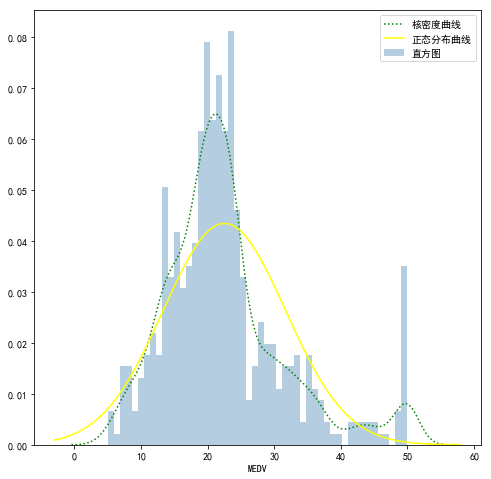

In [23]:
figure,axes=plt.subplots(1,1,figsize=(8,8))
sns.distplot(boston.MEDV,bins=50,fit=stats.norm,hist_kws={'color':'steelblue','label':'直方图'},
             kde_kws={'color':'green','linestyle':':','label':'核密度曲线'},
             fit_kws={'color':'yellow','linestyle':'-','label':'正态分布曲线'},ax=axes)
plt.legend()
plt.show()

In [24]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [25]:
boston.MEDV=np.log1p(boston.MEDV)

In [26]:
train,test=model_selection.train_test_split(boston,test_size=0.25,random_state=1234)

In [27]:
model1=sm.formula.ols('MEDV~CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT',data=train).fit()

In [28]:
pred1=model1.predict(test.drop('MEDV',axis=1))

In [29]:
train_pred=model1.predict(train.drop('MEDV',axis=1))

In [31]:
metrics.mean_squared_error(np.expm1(train.MEDV),np.expm1(train_pred))

18.381508590370178

In [32]:
metrics.mean_squared_error(np.expm1(test.MEDV),np.expm1(pred1))

26.37376466668332

In [33]:
df1=pd.DataFrame({'real':np.expm1(test.MEDV),'predict':np.expm1(pred1)})

In [34]:
df1

,real,predict
64,33.0,20.873263
100,27.5,22.296060
400,5.6,11.547405
485,21.2,20.953713
454,14.9,12.877872
288,22.3,26.976483
112,18.8,19.883253
478,14.6,17.412548
66,19.4,25.683863
187,32.0,33.032632


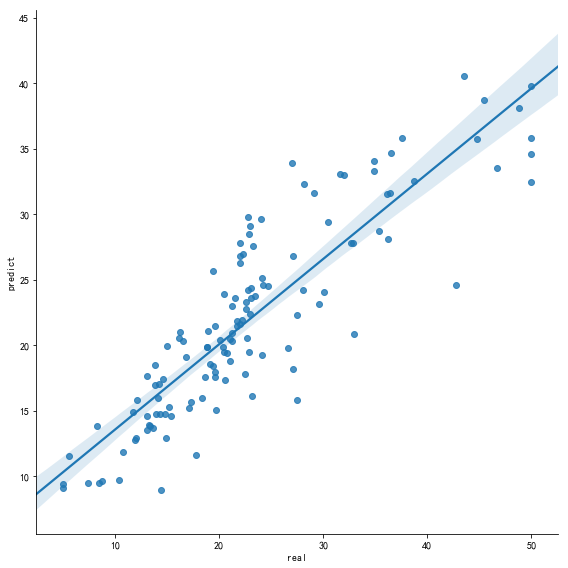

In [35]:
sns.lmplot(x='real',y='predict',data=df1,height=8,aspect=1)

In [36]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     102.0
Date:                Fri, 07 Jun 2019   Prob (F-statistic):          8.18e-113
Time:                        22:36:10   Log-Likelihood:                 129.61
No. Observations:                 379   AIC:                            -231.2
Df Residuals:                     365   BIC:                            -176.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.5727      0.223     20.530      0.000       4.135       5.011
CRIM          -0.0067      0.001     -4.686      0.000      -0.010      -0.004
ZN             0.0016      0.001      2.661      0.008       0.000       0.003
INDUS          0.0012      0.003      0.444      0.657      -0.004       0.007
CHAS           0.1007      0.036      2.793      0.005       0.030       0.172
NOX           -0.8741      0.163     -5.376      0.000      -1.194      -0.554
RM             0.0429      0.018      2.345      0.020       0.007       0.079
AGE            0.0002      0.001      0.291      0.771      -0.001       0.001
DIS           -0.0614      0.009     -6.647      0.000      -0.080      -0.043
RAD            0.0152      0.003      5.215      0.000       0.009       0.021
TAX           -0.0006      0.000     -3.704      0.000      -0.001      -0.000
PTRATIO       -0.0416      0.006     -7.474      0.000      -0.053      -0.031
B              0.0005      0.000      4.340      0.000       0.000       0.001
LSTAT         -0.0288      0.002    -13.868      0.000      -0.033      -0.025
==============================================================================
Omnibus:                       41.695   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.289
Skew:                           0.362   Prob(JB):                     4.72e-37
Kurtosis:                       6.173   Cond. No.                     1.52e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
for i in range(10):
    print(variance_inflation_factor(train.drop(['INDUS','AGE','CHAS'],axis=1).values,i))

2.0250809923163
2.71136700248414
67.44945132374905
134.9149815786189
12.36920221003697
14.190211266253757
51.84367684615617
86.85371775515524
22.439674108941755
10.14403987883719


In [38]:
train.drop(['INDUS','AGE','MEDV'],axis=1).corrwith(train.MEDV)

CRIM      -0.454865
ZN         0.379163
CHAS       0.165890
NOX       -0.498167
RM         0.588220
DIS        0.325043
RAD       -0.459118
TAX       -0.546714
PTRATIO   -0.494519
B          0.439701
LSTAT     -0.800379
dtype: float64

In [39]:
outliers=model1.get_influence()

In [40]:
studentize=outliers.resid_studentized_external

In [41]:
train.index=range(train.shape[0])

In [42]:
train=pd.concat([train.drop(['INDUS','AGE','CHAS'],axis=1),pd.Series(studentize,name='studentize')],axis=1)

In [43]:
train.loc[np.abs(train.studentize)>2,:].shape[0]/train.shape[0]

0.047493403693931395

In [44]:
train=train.loc[np.abs(train.studentize)<2,:]

In [45]:
train.head()

,CRIM,ZN,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,studentize
0,0.03548,80.0,0.392,5.876,9.2203,1,315,16.4,395.18,9.25,3.086487,-0.163863
1,0.17134,0.0,0.547,5.928,2.4631,6,432,17.8,344.91,15.76,2.960105,-0.344527
2,0.53700,0.0,0.504,5.981,3.6715,8,307,17.4,378.35,11.65,3.230804,-0.025458
3,0.09299,0.0,0.581,5.961,2.0869,2,188,19.1,378.09,17.93,3.068053,0.247681
4,2.44953,0.0,0.605,6.402,2.2625,5,403,14.7,330.04,11.32,3.148453,-0.598208


In [46]:
lambdas=np.logspace(-5,2,200)

In [47]:
lasso_cv=linear_model.LassoCV(alphas=lambdas,normalize=True,cv=10)

In [48]:
lasso_cv.fit(train.drop(['MEDV','studentize'],axis=1),train.MEDV)

LassoCV(alphas=array([1.00000e-05, 1.08437e-05, ..., 9.22198e+01, 1.00000e+02]),
    copy_X=True, cv=10, eps=0.001, fit_intercept=True, max_iter=1000,
    n_alphas=100, n_jobs=None, normalize=True, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [49]:
best_alpha=lasso_cv.alpha_

In [50]:
model2=linear_model.Lasso(alpha=best_alpha,normalize=True)

In [51]:
model2.fit(train.drop(['MEDV','studentize'],axis=1),train.MEDV)

Lasso(alpha=1e-05, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [53]:
model2.intercept_

3.8988085830383286

In [64]:
df3=pd.Series(model2.coef_,index=['CRIM', 'ZN', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])

In [65]:
df3

CRIM      -0.006317
ZN         0.001277
NOX       -0.598930
RM         0.095010
DIS       -0.049469
RAD        0.009790
TAX       -0.000460
PTRATIO   -0.036941
B          0.000573
LSTAT     -0.024919
dtype: float64

In [54]:
train.columns

Index(['CRIM', 'ZN', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT',
       'MEDV', 'studentize'],
      dtype='object')

In [55]:
pred2=model2.predict(test.drop(['MEDV','INDUS','AGE','CHAS'],axis=1))

In [56]:
train_pred2=model2.predict(train.drop(['MEDV','studentize'],axis=1))

In [58]:
metrics.mean_squared_error(np.expm1(train.MEDV),np.expm1(train_pred2))

9.582913915507906

In [59]:
metrics.mean_squared_error(np.expm1(test.MEDV),np.expm1(pred2))

22.914138663879516

In [57]:
df2=pd.DataFrame({'real':np.expm1(test.MEDV),'predict':np.expm1(pred2)})

In [60]:
df2

,real,predict
64,33.0,22.523818
100,27.5,23.037821
400,5.6,11.911977
485,21.2,20.536631
454,14.9,13.113334
288,22.3,26.374594
112,18.8,19.913451
478,14.6,17.120115
66,19.4,24.701114
187,32.0,32.594479
